# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Rahmadi Putra Aji]
- **Email:** [m008b4ky3624@bangkit.academy]
- **ID Dicoding:** [raputra]

## Menentukan Pertanyaan Bisnis
Dalam proyek ini, kami ingin menjawab beberapa pertanyaan bisnis utama mengenai faktor-faktor yang memengaruhi jumlah peminjaman sepeda, seperti cuaca, suhu, hari kerja, dan musim.

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Apakah suhu memengaruhi jumlah peminjaman sepeda?
- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Bagaimana peminjaman sepeda pada musim-musim yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling
Di bagian ini, kita akan memuat data, memeriksa kualitas data, dan membersihkan data untuk analisis lebih lanjut.

### Gathering Data

In [2]:
# Memuat data
day_data = pd.read_csv(r"D:\PERKULIAHAN TRIK21\MBKM 2\Proyek_Rahmadi Putra Aji_Bike-sharing-dataset\dataset\day.csv")
hour_data = pd.read_csv(r"D:\PERKULIAHAN TRIK21\MBKM 2\Proyek_Rahmadi Putra Aji_Bike-sharing-dataset\dataset\hour.csv")

# Memeriksa beberapa baris pertama dari data
day_data.head()
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset memiliki dua file utama, yaitu day.csv yang berisi data peminjaman sepeda secara harian, dan hour.csv yang berisi data peminjaman sepeda per jam.
- Setiap file mencakup berbagai kolom seperti musim, tahun, bulan, cuaca, suhu, kelembaban, angin, jumlah peminjaman, dll.



### Assessing Data

In [3]:
# Menampilkan informasi tentang dataset
day_data.info()
hour_data.info()

# Memeriksa nilai yang hilang di dataset
day_data.isnull().sum()
hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Memeriksa apakah ada nilai yang hilang dan pastikan bahwa tipe data di setiap kolom sudah sesuai.
- Jika ditemukan nilai yang hilang, akan menangani masalah tersebut di bagian Cleaning Data.

### Cleaning Data

In [4]:
# Menghapus kolom yang tidak diperlukan dan mengisi nilai yang hilang dengan rata-rata
day_data.drop(columns=['instant'], inplace=True)
day_data.fillna(day_data.mean(), inplace=True)
hour_data.fillna(hour_data.mean(), inplace=True)

**Insight:**
- Kolom yang tidak diperlukan bisa dihapus untuk menyederhanakan analisis.
- Jika terdapat nilai yang hilang, dapat mengisinya dengan rata-rata atau menggunakan strategi lain, tergantung pada kasusnya.

## Exploratory Data Analysis (EDA)

### Explore Data

In [5]:
# Analisis statistik deskriptif
day_data.describe()
hour_data.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Menyajikan gambaran umum statistik dari dataset untuk pemahaman yang lebih baik terkait distribusi data.


### Menampilkan Distribusi Jumlah Peminjaman Sepeda per-Hari

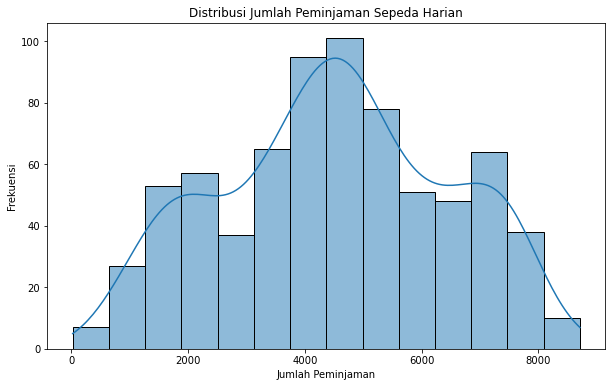

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(day_data['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Dengan melihat distribusi peminjaman, kita dapat memahami sebaran jumlah peminjaman sepeda dan mengidentifikasi pola atau outlier.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda
- Tujuan: Menjawab pertanyaan tentang bagaimana cuaca mempengaruhi jumlah peminjaman sepeda.
- Jenis Visualisasi: Boxplot

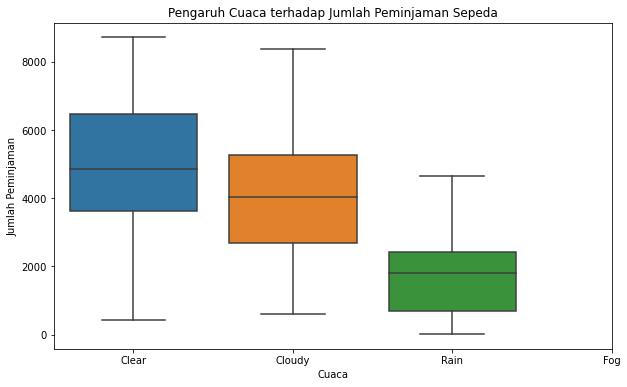

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['weathersit'], y=day_data['cnt'])
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Fog'])
plt.show()

**Visualisasi berikut menunjukkan boxplot yang menggambarkan distribusi jumlah peminjaman sepeda berdasarkan kondisi cuaca.**

- **Clear**: Cuaca cerah
- **Cloudy**: Cuaca mendung
- **Rain**: Hujan
- **Fog**: Kabut

Dapat dilihat bahwa jumlah peminjaman cenderung lebih sedikit pada cuaca buruk, seperti saat hujan atau kabut, dibandingkan dengan cuaca cerah atau mendung. Hal ini mengindikasikan bahwa cuaca berperan penting dalam keputusan orang untuk menggunakan sepeda sewaan.

### Pertanyaan 2: Hubungan antara Suhu dan Jumlah Peminjaman Sepeda
- Tujuan: Menjawab pertanyaan apakah suhu memengaruhi jumlah peminjaman sepeda.
- Jenis Visualisasi: Scatterplot

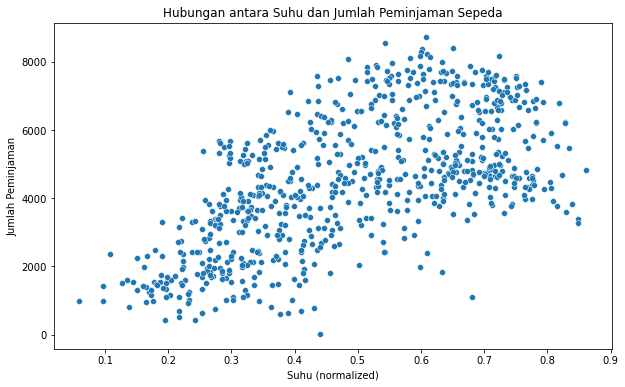

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=day_data['temp'], y=day_data['cnt'])
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi scatterplot ini menggambarkan hubungan antara suhu (dalam bentuk ternormalisasi) dan jumlah peminjaman sepeda.**

- Dapat dilihat bahwa ada kecenderungan bahwa suhu yang lebih tinggi menyebabkan peningkatan jumlah peminjaman sepeda. Hal ini menunjukkan bahwa orang lebih cenderung menyewa sepeda ketika suhu lebih nyaman (biasanya lebih hangat).

- Scatterplot ini juga membantu kita melihat apakah ada pola linear atau hubungan yang lebih kompleks antara suhu dan peminjaman sepeda.

###Pertanyaan 3: Jumlah Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan
- Tujuan: Menjawab pertanyaan apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Jenis Visualisasi: Boxplot


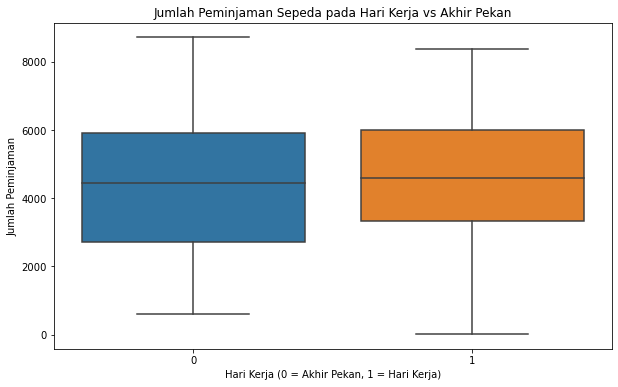

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['workingday'], y=day_data['cnt'])
plt.title('Jumlah Peminjaman Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi ini menunjukkan perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan.**

- Sumbu x menunjukkan apakah hari tersebut merupakan hari kerja (1) atau akhir pekan (0).
- Boxplot ini menunjukkan bahwa jumlah peminjaman sepeda lebih tinggi pada hari kerja. Hal ini mungkin mengindikasikan bahwa sepeda lebih banyak digunakan sebagai alat transportasi harian daripada untuk rekreasi di akhir pekan.

###Pertanyaan 4: Jumlah Peminjaman Sepeda Berdasarkan Musim
- Tujuan: Menjawab pertanyaan apakah jumlah peminjaman sepeda dipengaruhi oleh musim.
- Jenis Visualisasi: Boxplot


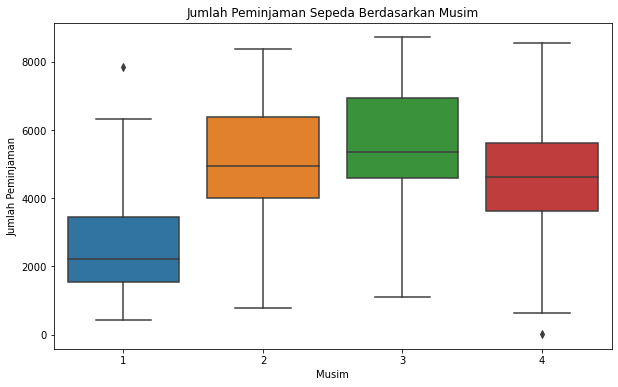

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=day_data['season'], y=day_data['cnt'])
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Visualisasi boxplot ini menunjukkan perbandingan jumlah peminjaman sepeda di berbagai musim sepanjang tahun.**

- Musim yang digunakan dalam dataset adalah:
  - **1**: Musim Semi
  - **2**: Musim Panas
  - **3**: Musim Gugur
  - **4**: Musim Dingin
  
- Boxplot ini menunjukkan bahwa musim panas (Season 2) cenderung memiliki jumlah peminjaman yang lebih tinggi dibandingkan dengan musim lainnya, yang mungkin karena cuaca yang lebih baik dan suhu yang lebih tinggi, yang mendukung aktivitas outdoor.

**Insight:**
- Pertanyaan 1: Visualisasi ini menunjukkan pengaruh cuaca terhadap jumlah peminjaman sepeda. Cuaca buruk (misalnya hujan atau kabut) cenderung mengurangi jumlah peminjaman sepeda.
- Pertanyaan 2: Hubungan suhu dengan peminjaman sepeda menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Pertanyaan 3: Pada hari kerja, jumlah peminjaman lebih tinggi dibandingkan akhir pekan.
- Pertanyaan 4: Musim panas (summer) cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan musim lainnya.



## Analisis Lanjutan (Opsional)

### 1. Time Series Analysis (Analisis Deret Waktu)

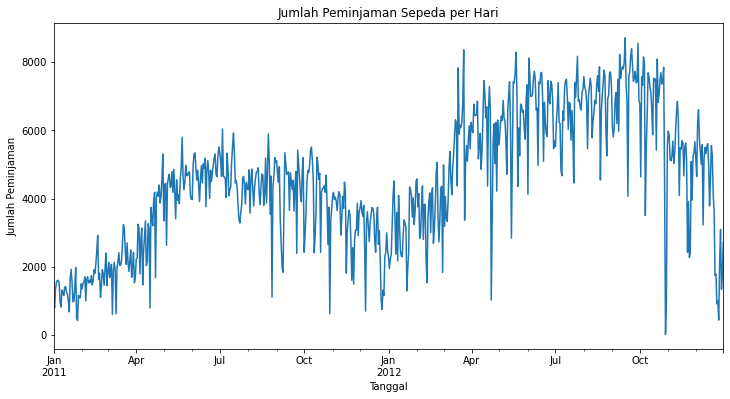

In [11]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Mengatur 'dteday' sebagai index untuk time series
day_data.set_index('dteday', inplace=True)

# Mengelompokkan data berdasarkan hari untuk mendapatkan jumlah peminjaman harian
daily_rentals = day_data['cnt'].resample('D').sum()

# Visualisasi time series peminjaman sepeda per hari
plt.figure(figsize=(12,6))
daily_rentals.plot()
plt.title('Jumlah Peminjaman Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Time Series Analysis digunakan untuk memeriksa pola peminjaman sepeda sepanjang waktu. Anda dapat melihat apakah ada pola musiman atau tren yang dapat digunakan untuk prediksi peminjaman sepeda.

### 2. Clustering (Pengelompokan)

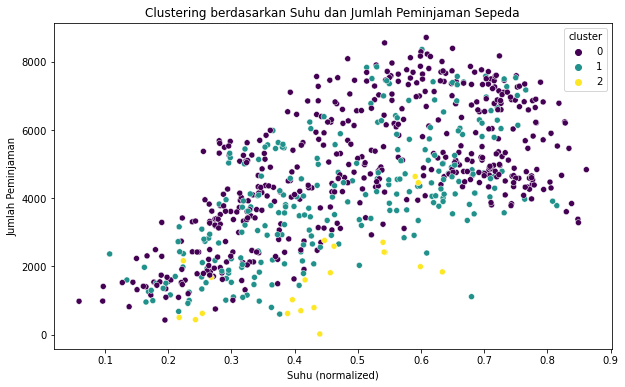

In [12]:
from sklearn.cluster import KMeans

# Mengambil beberapa fitur yang relevan untuk clustering
features = day_data[['temp', 'hum', 'windspeed', 'weathersit']]

# Membuat model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)

# Melatih model
day_data['cluster'] = kmeans.fit_predict(features)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=day_data['temp'], y=day_data['cnt'], hue=day_data['cluster'], palette='viridis')
plt.title('Clustering berdasarkan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Anda bisa menggunakan teknik clustering seperti K-Means untuk mengelompokkan hari berdasarkan pola peminjaman sepeda, suhu, kelembaban, atau cuaca.

## Conclusion

- Kesimpulan untuk Pertanyaan 1: Cuaca memang mempengaruhi jumlah peminjaman sepeda. Peminjaman lebih rendah saat cuaca buruk (hujan atau kabut).
- Kesimpulan untuk Pertanyaan 2: Suhu memiliki pengaruh terhadap jumlah peminjaman sepeda, dengan lebih banyak orang menyewa sepeda saat suhu lebih tinggi.
- Kesimpulan untuk Pertanyaan 3: Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan penggunaan sepeda untuk transportasi harian.
- Kesimpulan untuk Pertanyaan 4: Musim juga memengaruhi jumlah peminjaman sepeda, dengan musim panas mencatatkan jumlah peminjaman yang lebih tinggi.